<a href="https://colab.research.google.com/github/GB-Navarro/MAC0209/blob/main/Modelagem_EP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="5"> <a href="https://uspdigital.usp.br/jupiterweb/obterDisciplina?sgldis=MAC0209"> Exercício de MAC0209 - Modelagem e Simulação</a> </font>

Cauê Fornielles da Costa (14564489) (IME-USP)

Gabriel da Silva Navarro (13727908) (IME-USP)

Kim Kakeya V. Carvalho (14586560) (IME-USP)

***
<font size="5"> EP — Abordagem Determinística </font>
***

# Setup

In [ ]:
# Importa o módulo 'drive' do pacote 'google.colab' para montar o Google Drive no ambiente do Google Colab. Isto é feito pois,
# a montagem do Google Drive torna mais fácil e conveniente o acesso a esses arquivos diretamente do ambiente do Colab.

from google.colab import drive
drive.mount('/content/drive')

In [6]:
# Importa as bibliotecas que serão utilizadas ao longo desse jupyter notebook.

import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
import random
import math

# Lib

In [ ]:
# Lib aqui


# Edite seu path abaixo:
def myPath():
  workDir = '/content/drive/MyDrive/doc/Courses/Modelagem/programas/jupyter/2022/'
  return(workDir)

def demoWorkDir():
  # Usa o ponto de montagem do google drive para  ler e salvar dados
  wd = myPath()
  csvFile = wd + 'foo.csv'

  df = pd.read_csv(csvFile, sep = ';')
  print(df.to_string())

demoWorkDir()


          time  gFx    gFy    gFz    TgF
0   12.062.115 -352  9.970  1.400  1.007
1   12.577.769 -352  9.970  1.400  1.007
2   12.831.577 -354  9.975  1.407  1.008
3   13.105.423 -362  9.992  1.478  1.011
4   13.307.038 -330  9.966  1.593  1.010
5      135.025 -320  9.968  1.669  1.011
6   13.778.961 -325  9.966  1.840  1.014
7   13.974.884 -340  9.970  1.942  1.016
8   14.169.577 -337  9.978  2.140  1.021
9   14.361.346 -349  9.958  2.345  1.024
10  14.551.269 -359  9.924  2.560  1.026
11  17.048.615 -359  9.924  2.560  1.026
12  17.398.038 -386  9.914  2.639  1.027
13  17.939.346 -386  9.904  2.660  1.026
14      20.016 -379  9.897  2.722  1.027


# Main

## Simulação de movimento unidimensional

### Modelagem de uma partícula que se move unidimensionalmente

In [17]:
class Particle1D:

  def __init__(self, initial_position, speed, initial_time, final_time):
    '''
      Description:
        Construtor da classe "Particle1D".

        A classe "Particle1D" representa uma partícula que está em movimento unidimensional. Tal partícula deve receber como atributos
        iniciais a sua posição inicial, a sua velocidade (constante) e os instantes inicial e final de tempo que serão considerados no
        experimento. Após isso, será calculado para essa partícula as suas posições em função do tempo, posições essas que também serão
        um atributo da partícula.

      Args:
        self (Particle1D): Objeto do tipo "Particle1D".
        initial_position (float): Posição inicial da partícula considerada no experimento.
        speed (float): Velocidade da partícula considerada no experimento.
        initial_time (int): Inteiro que representa o instante de tempo inicial do experimento.
        final_time (int): Inteiro que representa o instante de tempo final do experimento.

      Return:
        None
    '''

    # Seta alguns atributos (públicos) iniciais da partícula com base nos parâmetros recebidos.
    self.initial_position = initial_position
    self.speed = speed

    # Seta alguns atributos (que seriam privados) iniciais da partícula com base nos parâmetros recebidos. A ideia dos atributos abaixo serem privados
    # é que se use no lugar deles o atributo "time_variations".
    self._initial_time = initial_time
    self._final_time = final_time

    # Com base em "initial_time" e "final_time" é criado uma lista de inteiros que representa os intervalos de tempo do experimento. Tal lista
    # de inteiros é guardada no atributo "time_variations". Vale ressaltar que existem (final_time - initial_time) + 1 intervalos de tempo, e
    # cada intervalo de tempo tem uma diferença de 1 segundo para o intervalo anterior.
    self.time_variations = [i for i in range(initial_time,(final_time + 1),1)]

    # Calcula com base nos atributos iniciais da partícula as suas posições em função do tempo e guarda esse dados no atributo "positions".
    self.positions = self.get_position_as_a_time_function()


  def __str__(self):
    '''
      Description:
        Esse método é responsável por gerar uma representação em formato de string para objetos do tipo "Particle1D".

      Args:
        self (Particle1D): Objeto do tipo "Particle1D" que será printado.

      Return:
        representation (string): Representação da partícula através de uma string.
    '''

    # Guarda em variáveis os atributos básicos da partícula em questão convertidos para string.
    initial_position = str(self.initial_position)
    speed = str(self.speed)

    # Transforma cada elemento do vetor "self.time_variations" em string e após isso transforma todo o vetor em uma única string, mantendo a
    # representação de lista.
    time_variations = [str(time_variation)+"s" for time_variation in self.time_variations]
    time_variations = '[' + ','.join(time_variations) + ']'

    # Transforma cada elemento do vetor "self.positions" em string e após isso transforma todo o vetor em uma única string, mantendo a
    # representação de lista.
    positions = [str(position)+"m" for position in self.positions]
    positions = '[' + ','.join(positions) + ']'

    # Cria uma representação em formato de string para objetos do tipo "Particle1D".
    representation = "Posição inicial: " + initial_position + " m\n" + "Velocidade: " + speed + " m/s\n" + "Tempo: " + time_variations + "\n" +"Posição(tempo): " + positions + "\n"

    # Retorna a representação criada.
    return representation

  def get_position_as_a_time_function(self):
    '''
      Description:
        Esse método calcula e seta a posição final de uma partícula com base em 4 parâmetros
        dados (posição inicial, velocidade, instante inicial de tempo, instante final de tempo).
        Para tal, a fórmula (em Latex) $x(t_{2}) = x(t_{1}) + v \cdot (t_{2} - t_{1})$ é usada.

      Args:
        self (Particle1D): Objeto do tipo "Particle1D" no qual o atributo "final_position" será setado.

      Return:
        None
    '''

    # Gera um vetor que representa a posição da partícula em cada instante de tempo. Tais posições são calculadas através da fórmula
    # (em latex) $x(t) = x_{0} + v \cdot (t - t_{0})$.
    return [self.initial_position + self.speed * delta_t for delta_t in self.time_variations]

  def get_speed_as_a_time_function(self):
    '''
      Description:
        Esse método calcula e seta a velocidade de uma partícula com base em 4 parâmetros
        dados (posição inicial, posição final, instante inicial de tempo, instante final de tempo).
        Para tal, a fórmula (em Latex) $v = \frac{x(t_{2}) - x(t_{1})}{t_{2} - t_{1}}$ é usada.

      Args:
        self (Particle1D): Objeto do tipo "Particle1D" na qual o atributo "speed" será setado.

      Return
        None
    '''

    # Gera um vetor que representa a velocidade da partícula em cada instante de tempo. Tais velocidades (que devem ser iguais) são calculadas
    # através da fórmula (em latex) $v = \frac{x - x_{0}}{t - t_{0}}$.
    space_intervals = [position - self.initial_position for position in self.positions[1:]]
    time_intervals = [t - self._initial_time for t in self.time_variations[1:]]

    return [space / time for space, time in zip(space_intervals, time_intervals)]

### Criação da amostra


In [18]:
def create_Particle1D_sample(seed):
  '''
      Description:
        Essa função gera uma amostra aleatória de um objeto do tipo "Particle1D", isto é,
        de uma partícula que se move unidimensionalmente.

      Args:
        seed (int): Inteiro que será usado como semente para a geração de números pseudo-aleatórios.

      Return:
        particle (Particle1D): Objeto do tipo "Particle1D".
  '''

  # Usa a semente recebida como parâmetro para a geração de números pseudo-aleatórios.
  random.seed(seed)

  # Gera um números pseudo-aleatório entre 0 e 1000 que representará a posição inicial da partícula no experimento.
  initial_position = random.randint(0,1000)

  # Gera um número pseudo-aletório entre 10 e 10000 que representará a velocidade da partícula no experimento.
  speed = random.randint(10,10000)

  # Gera um número pseudo-aleatório entre 0 e 100 que representará o instante inicial de tempo onde o movimento da partícula se iniciará.
  initial_time = random.randint(0,100)

  # Gera um número pseudo-aleatório que representa o instante de tempo onde o movimento da partícula se cessará. Tal número é gerado como
  # função do número "initial_time".
  final_time = initial_time*random.randint(10,50)

  # Cria um novo objeto do tipo "Particle1D" com os atributos guardados nas variáveis acima.
  particle = Particle1D(initial_position, speed, initial_time, final_time)

  # Retorna a partícula criada.
  return particle

In [19]:
def save_Particle1D_values(filename, sample):
  '''
    Description:
      Essa função é responsável por salvar os dados de uma amostra em um arquivo '.csv'.

    Args:
      filename (string): String que representa o nome do arquivo '.csv' em que os dados da amostra serão salvos.
      sample (Particle1D): Objeto do tipo "Particle1D".

    Return
      None
  '''

  # A variável abaixo é responsável por guardar o tamanho dos vetores que serão passados para o data frame. Isto é, ela guarda o número de
  # linha que o data frame a ser criado possuirá.
  # Observe que len(sample.time_variations) == len(sample.positions)
  number_of_intervals = len(sample.time_variations)

  # Cria um data frame com base nos dados da amostra recebida como parâmetro
  df = pd.DataFrame({
      "Posição inicial (m)": [sample.initial_position for _ in range(number_of_intervals)],
      "Velocidade (m/s)": [sample.speed for _ in range(number_of_intervals)],
      "Tempo (s)": sample.time_variations,
      "Posição em função do tempo (m)": sample.positions
  })

  # Salva o data frame criado em um arquivo '.csv' de nome 'filename'.
  df.to_csv(filename, index=False)

### Execução da simulação

In [20]:
def execute_1D_simulation(seed,filename):
  '''
    Description:
      Função responsável por chamar as funções que executam a simulação do movimento unidimensional da particula.

      PS: A simulação ocorre no próprio objeto "Particle1D", já que na criação de objetos desse tipo é calculado a sua posição em função
      do tempo e, se preciso, a sua velocidade em função do tempo (embora a mesma seja constante).

    Args:
      None

    Return
      None
  '''

  # Cria a amostra que será usada na simulação.
  sample = create_Particle1D_sample(seed)

  # Cria um data frame com os resultados obtidos da simulação com a amostra criada acima e, após isso,
  # salva esse data frame em um arquivo '.csv'.
  save_Particle1D_values(filename, sample)

execute_1D_simulation(10,'Particle1D')

### Exibição dos resultados obtidos em uma tabela

In [21]:
def open_and_show_Particle1D_table(filename):
    '''
    '''

    # Cria um data frame a partir do arquivo 'filename'.csv .
    df = pd.read_csv(filename)

    # Exibe o DataFrame criado.
    display(df)


In [22]:
open_and_show_Particle1D_table("Particle1D")

,Posição inicial (m),Velocidade (m/s),Tempo (s),Posição em função do tempo (m)
0,585,543,54,29907
1,585,543,55,30450
2,585,543,56,30993
3,585,543,57,31536
4,585,543,58,32079
...,...,...,...,...
2102,585,543,2156,1171293
2103,585,543,2157,1171836
2104,585,543,2158,1172379
2105,585,543,2159,1172922


### Exibição dos resultados obtidos em gráficos

In [23]:
def open_and_plot_Particle1D_position_graph(filename):
  '''
    Description:
      Essa função é responsável por plotar um gráfico que representa a posição de uma particula em função do tempo. Para tal, é lido
      um arquivo '.csv' que contém os dados da simulação do movimento uniforme unidimensional de uma partícula.

    Args:
      filename (string): String que representa o nome do arquivo '.csv' em que se encotram os dados de da amostra usada na simulação.

    Return:
      None
  '''

  # Lê o arquivo '.csv' e o transforma em um data frame.
  df = pd.read_csv(filename)

  # Lê do data frame as amostras de tempo que serão usadas no eixo x.
  time_samples = df['Tempo (s)'].values
  # Lê do data frame os resultados de posição em função do tempo que serão usadas no eixo y.
  space_samples = df['Posição em função do tempo (m)'].values

  # Cria uma nova figura com o tamanho especificado (largura: 8 polegadas, altura: 4 polegadas).
  pyplot.figure(figsize=(8, 4))

  # Plota o gráfico de posição versus tempo usando os dados fornecidos.
  pyplot.plot(time_samples, space_samples, marker='o', linestyle='-')

  # Adiciona algumas informações ao gráfico.
  pyplot.title('Posição x Tempo')
  pyplot.xlabel('Tempo (s)')
  pyplot.ylabel('Posição (m)')

  # Exibe o gráfico plotado.
  pyplot.grid(True)
  pyplot.show()

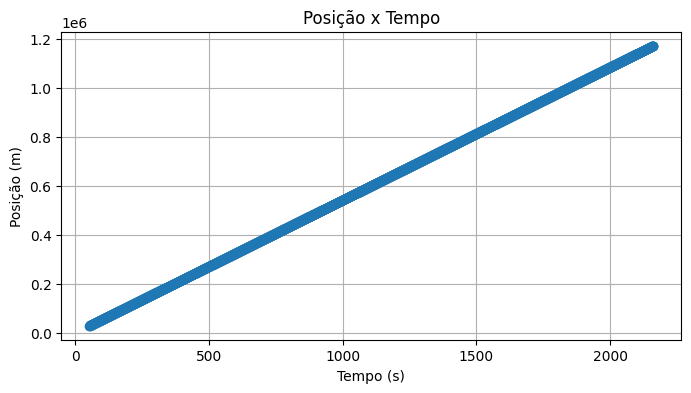

In [24]:
# Plota o gráfico de Posição x Tempo.
open_and_plot_Particle1D_position_graph('Particle1D')

In [25]:
def open_and_plot_Particle1D_speed_graph(filename):
  '''
    Description:
      Essa função é responsável por plotar um gráfico que representa a velocidade de uma particula em função do tempo. Para tal, é lido
      um arquivo '.csv' que contém os dados da simulação do movimento uniforme unidimensional de uma partícula.

    Args:
      filename (string): String que representa o nome do arquivo '.csv' em que se encotram os dados de da amostra usada na simulação.

    Return:
      None
  '''

  # Lê o arquivo '.csv' e o transforma em um data frame.
  df = pd.read_csv(filename)

  # Lê do data frame as amostras de tempo que serão usadas no eixo x.
  time_samples = df['Tempo (s)'].values
  # Lê do data frame os resultados de posição em função do tempo que serão usadas no eixo y.
  space_samples = df['Velocidade (m/s)'].values

  # Cria uma nova figura com o tamanho especificado (largura: 8 polegadas, altura: 4 polegadas).
  pyplot.figure(figsize=(8, 4))

  # Plota o gráfico de posição versus tempo usando os dados fornecidos.
  pyplot.plot(time_samples, space_samples, marker='o', linestyle='-')

  # Adiciona algumas informações ao gráfico.
  pyplot.title('Velocidade x Tempo')
  pyplot.xlabel('Tempo (s)')
  pyplot.ylabel('Velocidade (m/s)')

  # Exibe o gráfico plotado.
  pyplot.grid(True)
  pyplot.show()

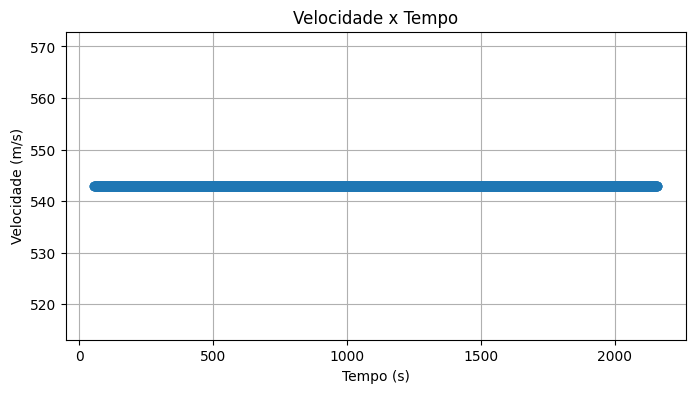

In [26]:
# Plota o gráfico de Velocidade x Tempo.
open_and_plot_Particle1D_speed_graph('Particle1D')

## Simulação de quedra livre

## Visualização de sistemas dinâmicos caóticos